In [6]:
import pickle

D = {}
for filename in ['./sims-FashionMNIST.pkl', './sims-MNIST.pkl']:
    with open(filename, 'rb') as f:
        data = pickle.load(f)
        name = filename.replace('./sims-', '').replace('.pkl', '')
        for d in data:
            d['dataset'] = name
        D[name] = data

In [16]:
import pandas as pd
key = 'FashionMNIST'
df = pd.DataFrame(sum([v for k, v in D.items()], []))
df.head()

,accuracy,dataset,epochs,loss,margin_dist,steps
0,0.1515,FashionMNIST,0.000067,2.294648,"[0.0012107740622013807, 0.005856884643435478, ...",4
1,0.1446,FashionMNIST,0.000083,2.292646,"[0.00045087927719578147, 0.0006797211826778948...",5
2,0.1489,FashionMNIST,0.000133,2.287029,"[0.0017808035481721163, 0.0016050615813583136,...",8
3,0.1518,FashionMNIST,0.000217,2.278882,"[0.0018749511800706387, 0.0036418188828974962,...",13
4,0.1682,FashionMNIST,0.000317,2.270322,"[0.001536860130727291, 0.002035415032878518, 0...",19


Text(0,0.5,'Accuracy')

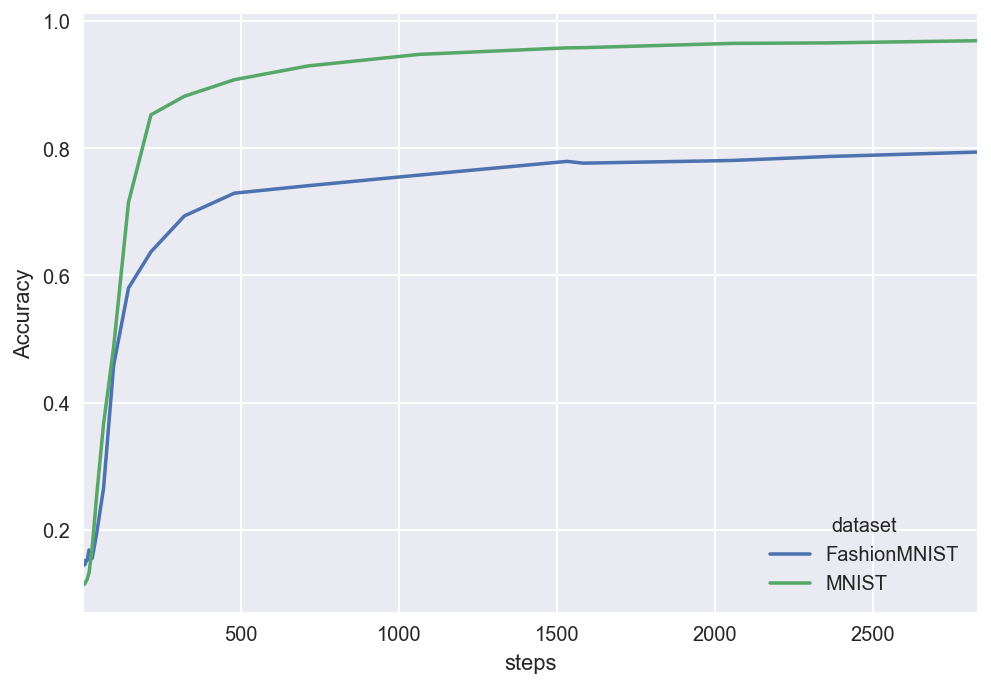

In [83]:
show = df.pivot_table(index='steps', columns='dataset', values='accuracy')
show.plot()
plt.ylabel('Accuracy')

233.6729452722188
torch.Size([60000])
581.9091227462771
torch.Size([60000])


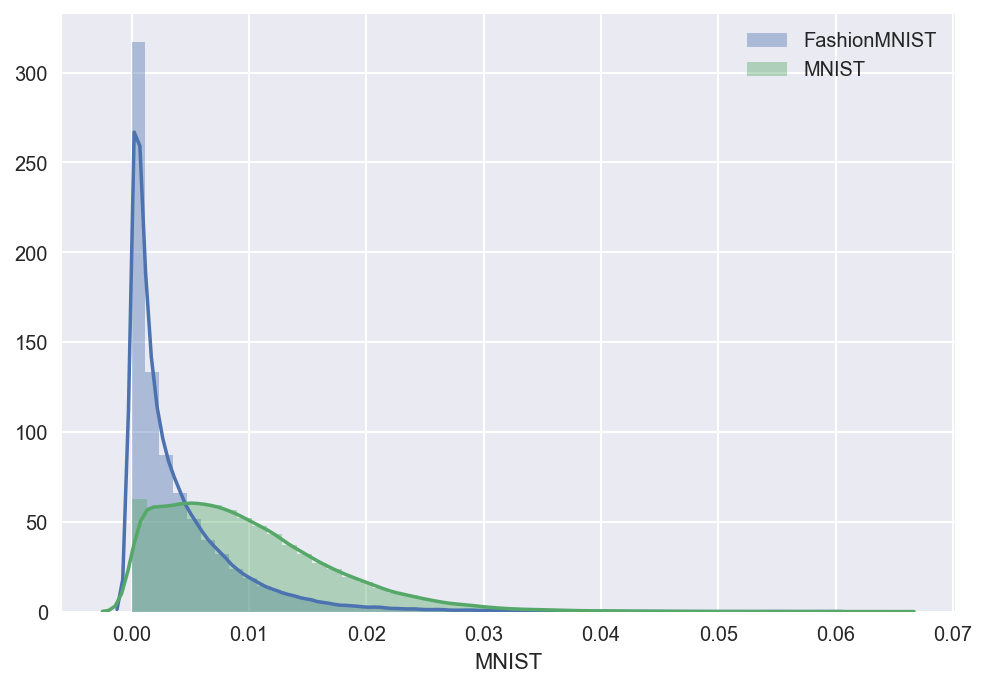

In [82]:
# get margins for a particular accuracy
import numpy as np
acc = 0.65
M = {}
for key in ['FashionMNIST', 'MNIST']:
    _df = df[df.dataset == key]
    margins = _df['margin_dist']
    print(margins[margins.index.max()].sum())
    print(margins[margins.index.max()].shape)
    M[key] = margins[margins.index.max()]
show = pd.DataFrame(M)
# show.plot.hist()
import seaborn as sns
for key in ['FashionMNIST', 'MNIST']:
    sns.distplot(show[key], label=key)
plt.legend(loc='best')

In [94]:
# get margins for a particular accuracy
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import numpy as np

def plot(accuracy=0.65):
    margins = {}
    for key in ['FashionMNIST', 'MNIST']:
        i = np.abs(accuracy - df[df.dataset == key]['accuracy']).argmin()
        margins[key] = df[df.dataset == key]['margin_dist'][i]
    show = pd.DataFrame(margins)
    # show.plot.hist()
    import seaborn as sns
    for key in ['FashionMNIST', 'MNIST']:
        sns.distplot(show[key], label=key)
    plt.legend(loc='best')
    plt.show()
    
from ipywidgets import interact
interact(plot, accuracy=(0.20, 1.0))

A Jupyter Widget

<function __main__.plot>